In [47]:
%matplotlib notebook

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
    
def set_ax_values(ax, limit):
    ax.set_xlabel('X_1')
    ax.set_ylabel('X_2')
    ax.set_zlabel('X_3')
    plt.title('Regions where X_(k) < {}, colour-coded by k in [1, 2, 3]'.format(limit))
    
def plot_3d(chunks, dotwidth, limit):
    fig, ax = plt.subplots(figsize=(12, 10))
    ax = plt.axes(projection='3d')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    ax.set_zlim([0.0, 1.0])
    set_ax_values(ax, limit)
    cmaps = ['magma', 'viridis', 'winter']
    
    for i, chunk in enumerate(chunks):
        xs, ys, zs = chunk
        cmap = cmaps[i % len(cmaps)]
        ax.scatter(xs, ys, zs, c=xs+ys+zs, cmap=cmap, linewidth=dotwidth, alpha=0.5)
    
    plt.show()

In [48]:
def size_filter_3d(xs, ys, zs, k, limit, less_than=True):
    assert k >= 1
    assert k <= 3
    new_xs = []
    new_ys = []
    new_zs = []
    
    for x, y, z in zip(xs, ys, zs):
        kth_val = sorted([x, y, z])[k - 1]

        if less_than:
            num_lte_limit = sum([x <= limit, y <= limit, z <= limit])
            
            if num_lte_limit == k:
                new_xs.append(x)
                new_ys.append(y)
                new_zs.append(z)

        else:
            num_gte_limit = sum([x >= limit, y >= limit, z >= limit])
            
            if num_gte_limit == 4 - k:
                new_xs.append(x)
                new_ys.append(y)
                new_zs.append(z)
                
    new_xs = np.array(new_xs)
    new_ys = np.array(new_ys)
    new_zs = np.array(new_zs)    
    return (new_xs, new_ys, new_zs)

<IPython.core.display.Javascript object>


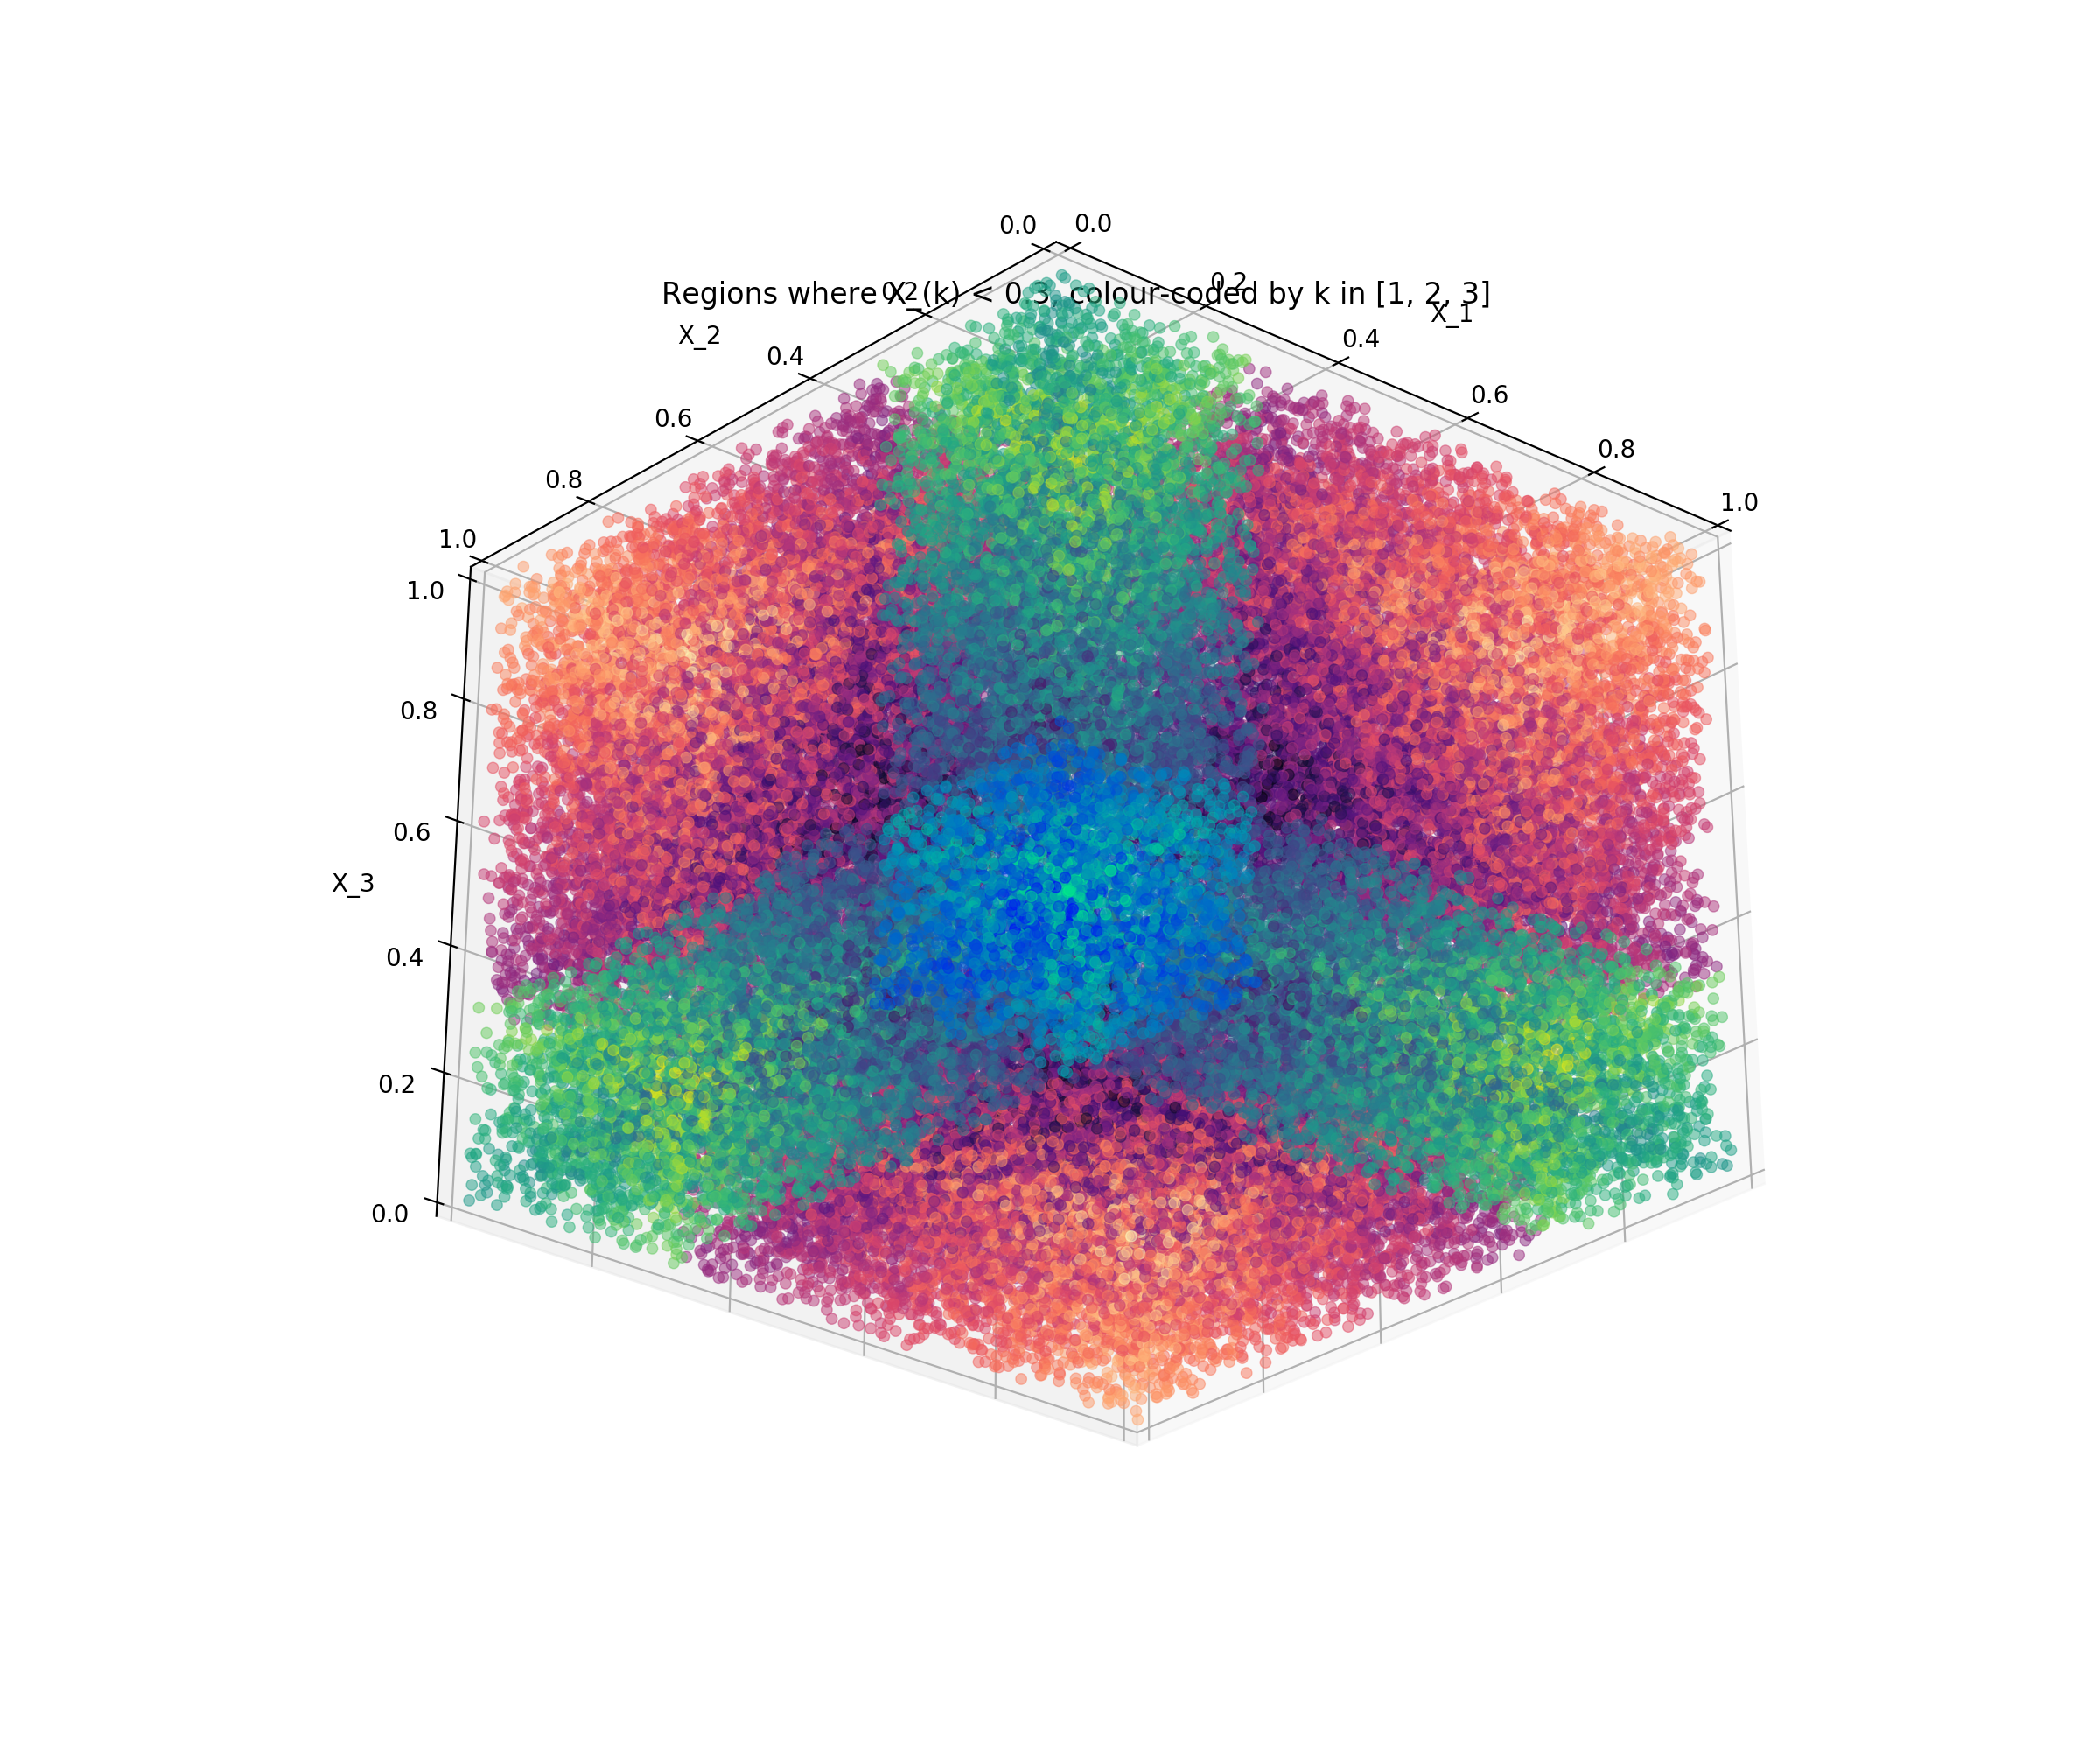

In [50]:
num = int(1e5)
dotwidth = 0.5
xs = np.random.random(num)
ys = np.random.random(num)
zs = np.random.random(num)
limit = 0.3

chunks = []
ranks = [1, 2, 3]

for rank in ranks:
    xs_f, ys_f, zs_f = size_filter_3d(xs, ys, zs, rank, limit, less_than=True)
    chunks.append((xs_f, ys_f, zs_f))
    
plot_3d(chunks, dotwidth, limit)

#### PDF calculations

Let $X_{1}, \ldots, X_{n}$ be uniform, independent random variables on the unit interval. Defining $X_{\textrm{max}} := \max(X_{1}, \ldots, X_{n})$ and $X_{\textrm{min}} := \min(X_{1}, \ldots, X_{n})$, we have cumulative distribution functions:

\begin{equation}
\Phi_{\textrm{max}}(x) := \textrm{pr}(X_{\textrm{max}} \le x) = x^{n}, \\
\Phi_{\textrm{min}}(x) := \textrm{pr}(X_{\textrm{min}} \le x) = 1 - (1-x)^{n}.
\end{equation}

By the Fundamental Theorem of Calculus, the corresponding PDFs are:

\begin{equation}
\varphi_{\textrm{max}}(x) = \frac{d}{dx}(x^{n}) = nx^{n-1}, \\
\varphi_{\textrm{min}}(x) = \frac{d}{dx}(1 - (1-x)^{n}) = n(1-x)^{n-1}.
\end{equation}

The associated expectations are:

\begin{equation}
\mathbb{E}(X_{\textrm{max}}) = \int_{0}^{1} x \cdot nx^{n-1} dx = n \int_{0}^{1} x^{n} dx = \frac{n}{n+1}, \\
\mathbb{E}(X_{\textrm{min}}) = \int_{0}^{1} x \cdot n(1-x)^{n-1} dx = n \int_{1}^{0} u^{n-1}(u-1) du = 
n \left( \frac{1}{n} - \frac{1}{n+1} \right) = \frac{1}{n+1} \cdot
\end{equation}

Some new notation: Let $X_{\textrm{rank}=k}$ be the $k^{\textrm{th}}$-largest random variable in the set $\{ X_{1}, \ldots, X_{n} \}$. For example, $X_{\textrm{rank}=2}$ denotes the second-largest of the $X_{i}$, while $X_{\textrm{rank}=1} = X_{\textrm{max}}$ and $X_{\textrm{rank}=n} = X_{\textrm{min}}$. Then we have:

\begin{equation}
\Phi_{\textrm{rank}=2}(x) := \textrm{pr}(X_{\textrm{rank}=2} \le x) = nx^{n-1} - (n-1)x^{n}, \\
\Phi_{\textrm{rank}=3}(x) := \textrm{pr}(X_{\textrm{rank}=3} \le x) = \binom{n}{2}x^{n-2} - yyy.
\end{equation}

By the Fundamental Theorem of Calculus, the corresponding PDF is:

\begin{equation}
\varphi_{\textrm{rank}=2}(x) = \frac{d}{dx}(nx^{n-1} - (n-1)x^{n}) = n(n-1)x^{n-2} - n(n-1)x^{n-1} = \\
n(n-1)(x^{n-2} - x^{n-1}).
\end{equation}

The associated expectation is:

\begin{equation}
\mathbb{E}(X_{\textrm{rank}=2}) = n(n-1) \int_{0}^{1} x(x^{n-2} - x^{n-1}) dx = 
n(n-1) \int_{0}^{1} (x^{n-1} - x^{n}) dx = n(n-1) \left( \frac{1}{n} - \frac{1}{n+1} \right) = \frac{n-1}{n+1} \cdot
\end{equation}

In [7]:
def rank_expectation(points, rank):
    foci = []
    
    for tpl in np.vstack(points).transpose():
        focus = sorted(list(tpl), reverse=True)[rank - 1]
        foci.append(focus)
        
    result = np.array(foci).mean()
    return result

In [8]:
num = int(1e4)
dotwidth = 4.5
xs = np.random.random(num)
ys = np.random.random(num)
zs = np.random.random(num)
limit = 0.2
rank = 2
#xs, ys, zs = size_filter_3d(xs, ys, zs, rank, limit, less_than=True)
#plot_3d(xs, ys, zs, dotwidth)
length = 7
points = [np.random.random(num) for _ in range(length)]
rank_expectation(points, rank)

0.7511405928119258